<a href="https://colab.research.google.com/github/SrishtiSingh25/IISC-AI-Project/blob/main/Image_Data_Compression_using_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
img=plt.imread("/ja.jpg")


#Read and plot the image

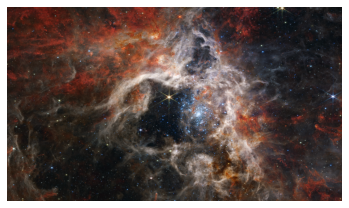

In [ ]:
plt.axis("off")
plt.imshow(img)
plt.show()


#Image is a three dimensional (RGB) object.

In [ ]:
print(img.shape)

(570, 985, 3)


In [ ]:
print(img)

[[[1. 1. 1. 0.]
  [1. 1. 1. 0.]
  [1. 1. 1. 0.]
  ...
  [1. 1. 1. 0.]
  [1. 1. 1. 0.]
  [1. 1. 1. 0.]]

 [[1. 1. 1. 0.]
  [1. 1. 1. 0.]
  [1. 1. 1. 0.]
  ...
  [1. 1. 1. 0.]
  [1. 1. 1. 0.]
  [1. 1. 1. 0.]]

 [[1. 1. 1. 0.]
  [1. 1. 1. 0.]
  [1. 1. 1. 0.]
  ...
  [1. 1. 1. 0.]
  [1. 1. 1. 0.]
  [1. 1. 1. 0.]]

 ...

 [[1. 1. 1. 0.]
  [1. 1. 1. 0.]
  [1. 1. 1. 0.]
  ...
  [1. 1. 1. 0.]
  [1. 1. 1. 0.]
  [1. 1. 1. 0.]]

 [[1. 1. 1. 0.]
  [1. 1. 1. 0.]
  [1. 1. 1. 0.]
  ...
  [1. 1. 1. 0.]
  [1. 1. 1. 0.]
  [1. 1. 1. 0.]]

 [[1. 1. 1. 0.]
  [1. 1. 1. 0.]
  [1. 1. 1. 0.]
  ...
  [1. 1. 1. 0.]
  [1. 1. 1. 0.]
  [1. 1. 1. 0.]]]


#Reshape img into a matrix

In [ ]:
#The array has 570 rows each of pixel 985x3. 
#Reshape it into the form of a matrix that PCA can understand. # 2955 = 985* 3

img_reshaped = np.reshape(img,(570,2955 ))
print(img_reshaped.shape)

#Make the data centred at origin

img_mean=img_reshaped.mean(axis=0)
img_reshaped=img_reshaped-img_mean

(570, 2955)


#Apply Principal Component Analysis

In [ ]:
from sklearn.decomposition import PCA
components=100
pca=PCA(n_components=components)
pca.fit(img_reshaped)

PCA(n_components=100)

#Note that T=XW, where W is the weight matrix with each column representing the eigen vector. Also WW'=I because W is an orthogonal coordinate system and eigen vectors are normalized to unit length.¶
To get back from T coordinate system to W coordinate system one needs to do as follows, X=TW'. Note that if W is the complete matrix then X is the exact representation, otherwise not. Also remember to do the de-normalization of X to get to the original values.

In [ ]:
#Following represents the values in the new coordinate system T=XW
img_transformed_coordinate=pca.transform(img_reshaped)
print(img_transformed_coordinate.shape)

#To go back to the old coordinate systesm, either use the inbuilt command or do the operations manually X=TW'
#img_original_coordinate = pca.inverse_transform(img_transformed_coordinate)

img_original_coordinate = img_transformed_coordinate.dot(pca.components_)

#Shifting the mean to original values

img_original_coordinate = img_original_coordinate+img_mean

(570, 100)


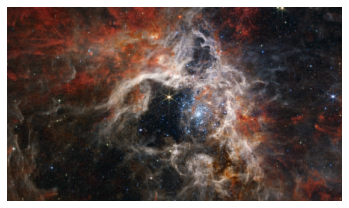

In [ ]:
#Reshaping the matrix 
img_final=np.reshape(img_original_coordinate,(570,985,3))
img_final=img_final.astype('int')

img_final[img_final<0]=0
img_final[img_final>255]=255

plt.axis("off")
plt.imshow(img_final)
plt.savefig("imagedata_new.jpg")
plt.show()

#Data Compression Achieved



In [ ]:
#Number of values required to store the original image

original_number_of_values=570*985*3

#Number of values required to store the original image

new_number_of_values=570*components+985*components+components
space_required_in_percentage= (new_number_of_values/original_number_of_values)*100

print("The compression Ratio")
print("%2f" % space_required_in_percentage )

The compression Ratio
9.237985
